In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow .keras import layers

In [15]:
data_train_path = 'C:\\Users\\HP\\Desktop\\Image Classification\\Classification\\Fruits_Vegetables\\train'
data_test_path =  'C:\\Users\\HP\\Desktop\\Image Classification\\Classification\\Fruits_Vegetables\\test'
data_val_path =   'C:\\Users\\HP\\Desktop\\Image Classification\\Classification\\Fruits_Vegetables\\validation'

In [17]:
img_width=180
img_height=180

In [19]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [21]:
data_cat=data_train.class_names

In [23]:
data_val=tf.keras.utils.image_dataset_from_directory( 
    data_val_path,
    shuffle=False,
    image_size=(img_height,img_width),
    batch_size=32,
    validation_split=False)

Found 351 files belonging to 36 classes.


In [25]:
data_test=tf.keras.utils.image_dataset_from_directory( 
    data_test_path,
    shuffle=False,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)

Found 359 files belonging to 36 classes.


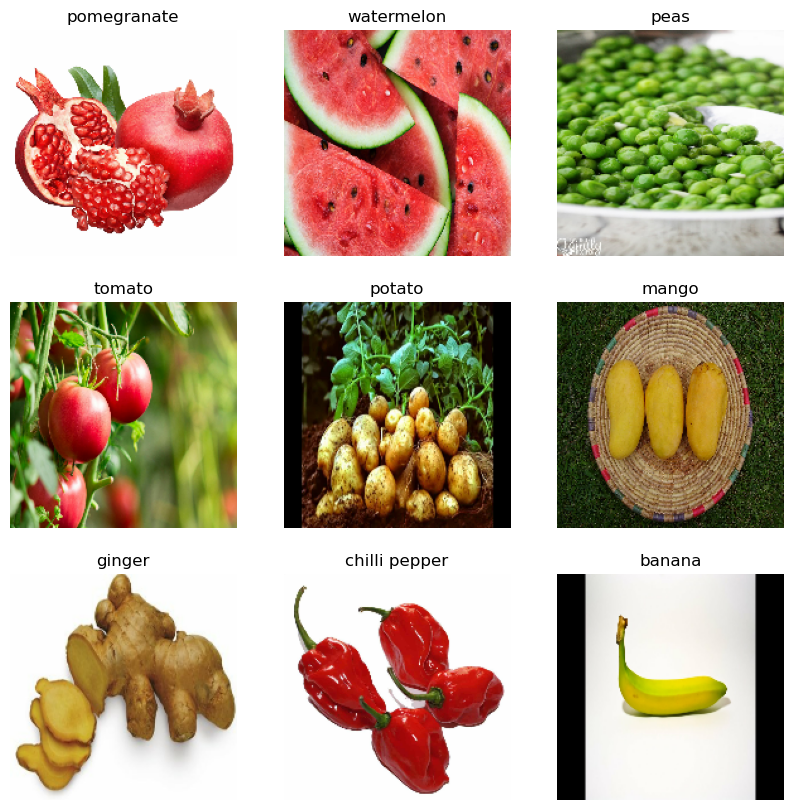

In [27]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [29]:
from tensorflow.keras.models import Sequential

In [31]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [33]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))  
])

In [35]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [37]:
epochs_size = 25
history = model.fit(data_train,validation_data=data_val,epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 80s 781ms/step - accuracy: 0.1078 - loss: 3.3740 - val_accuracy: 0.4644 - val_loss: 2.0057
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 62s 630ms/step - accuracy: 0.3530 - loss: 2.2235 - val_accuracy: 0.7436 - val_loss: 1.1324
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 62s 630ms/step - accuracy: 0.5381 - loss: 1.6260 - val_accuracy: 0.8405 - val_loss: 0.6887
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 63s 635ms/step - accuracy: 0.6844 - loss: 1.0441 - val_accuracy: 0.8860 - val_loss: 0.4282
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 64s 648ms/step - accuracy: 0.8380 - loss: 0.5726 - val_accuracy: 0.9544 - val_loss: 0.2680
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 64s 652ms/step - accuracy: 0.9290 - loss: 0.2935 - val_accuracy: 0.9601 - val_loss: 0.2388
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 66s 669ms/step - accuracy: 0.9553 - loss: 0.1935 - val_accuracy: 0.9573 - val_loss: 0.2902
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 65s 663ms/step - accuracy: 0.9639 - loss: 0.1933 - val_accu

Text(0.5, 1.0, 'Loss')

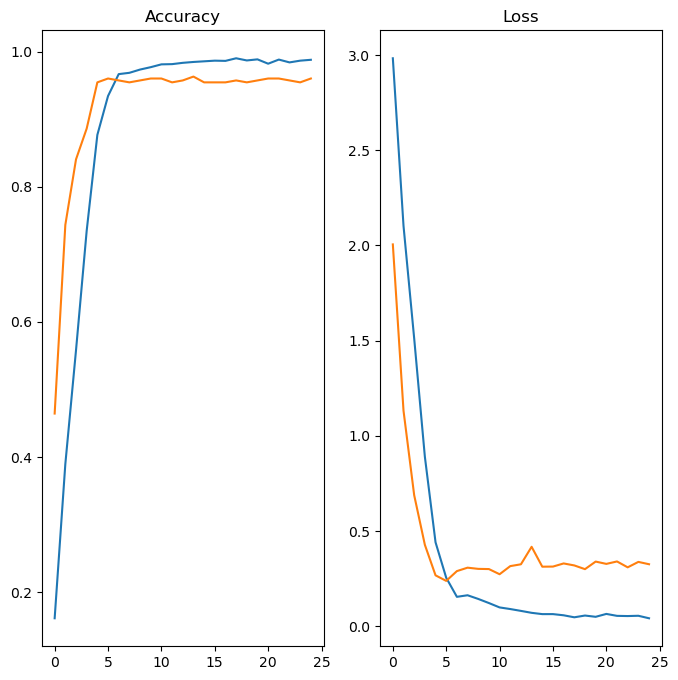

In [39]:
epochs_range=range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Training loss')
plt.plot(epochs_range,history.history['val_loss'],label='Validation loss')
plt.title('Loss')

In [84]:
image= 'Corn.jpg'
image=tf.keras.utils.load_img(image,target_size=(img_height,img_width))
img_arr=tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)
predict= model.predict(img_bat)
score=tf.nn.softmax(predict)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [86]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is corn with accuracy of 91.85


In [88]:
model.save('Image_classify.keras')